<a href="https://colab.research.google.com/github/HARJAP-SINGH-3105/Options-Pricing-and-Valuations/blob/main/Option_Valuations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd


#### ASSUMPTION: we are assuming European options throughout this notebook i.e. if options are exercised, then it will be only on Maturity date

In [ ]:
!pip install yahoo_fin


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 7.7 MB/s 
     |████████████████████████████████| 83 kB 1.8 MB/s 
     |████████████████████████████████| 50 kB 8.2 MB/s 
     |████████████████████████████████| 106 kB 75.3 MB/s 
     |████████████████████████████████| 127 kB 75.9 MB/s 
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=582c5fc0de35ed8dcdc66be2588a7547594ab687d3722af76c5a6c90c98bba75
  Stored in directory: /root/.cache/pip/wheels/e5/33/1f/68392720485b3ecf125a69e700baaab7624616deedea2fa6e2
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=a1c4e9f9ceb109e829cf494536dd81322f6075382c31edc94111ad24fdc2d93a
  Stored in directory: /root/.cache/pip/wheels/83/63/2f/117884c3b19d46b64d3d61690333aa80c88dc14050e269c546
Successfully built parse sgmllib3k
  Attempting uninstall: urllib3
    Found existing installation:

In [ ]:
from yahoo_fin.stock_info import *
from yahoo_fin.options import *

In [ ]:
sp_stocks = tickers_sp500()
len(sp_stocks)

503

In [ ]:
# # yahoo_fin has trouble pulling info for tickers with a hyphen in their name. So lets remove that.......
for item in sp_stocks:
  if(len(item.split('-'))>1):
    sp_stocks.remove(item)
print('The number of stocks: {}'.format(len(sp_stocks)))
# sp_stocks

The number of stocks: 501


In [ ]:
# Usually in the America, expiry day is the 3rd friday of the contract month at
get_expiration_dates(sp_stocks[0])

['January 20, 2023',
 'February 17, 2023',
 'May 19, 2023',
 'August 18, 2023',
 'January 19, 2024',
 'January 17, 2025']

In [ ]:
# Let’s go for February 17th (any of the dates will do)
expiry_date = get_expiration_dates(sp_stocks[0])[1]
data = pd.DataFrame()

for item in sp_stocks:
  try:
    price = get_live_price(item)
    option = get_calls(item ,expiry_date)
    option['CurrentPrice'] = price
    option['Ticker'] = item
    option['DateExp'] =expiry_date
    data = data.append(option)
    print(price)
    print(item)
  except:
    print('Option contracts are not available on {}'.format(expiry_date))
    pass
    

149.17999267578125
A
12.369999885559082
AAL
145.66000366210938
AAP
126.67500305175781
AAPL
163.0500030517578
ABBV
169.17999267578125
ABC
108.69999694824219
ABT
63.459999084472656
ACGL
265.8900146484375
ACN
330.6400146484375
ADBE
161.0800018310547
ADI
93.44999694824219
ADM
239.86500549316406
ADP
183.7100067138672
ADSK
90.16999816894531
AEE
95.98999786376953
AEP
28.469999313354492
AES
71.98999786376953
AFL
63.150001525878906
AIG
124.41999816894531
AIZ
189.13999938964844
AJG
83.51499938964844
AKAM
214.36000061035156
ALB
201.1300048828125
ALGN
42.2400016784668
ALK
135.83999633789062
ALL
105.19000244140625
ALLE
94.29000091552734
AMAT
11.984999656677246
AMCR
62.244998931884766
AMD
139.50999450683594
AME
262.20001220703125
AMGN
307.29998779296875
AMP
212.52000427246094
AMT
82.02999877929688
AMZN
118.41999816894531
ANET
234.5800018310547
ANSS
300.8599853515625
AON
57.290000915527344
AOS
45.60499954223633
APA
310.489990234375
APD
75.54000091552734
APH
90.97000122070312
APTV
144.60000610351562
A

In [ ]:
data.head()

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,CurrentPrice,Ticker,DateExp
0,A230217C00090000,2022-09-23 2:50PM EST,90.0,36.00,41.4,43.6,0.0,-,1,1,0.00%,149.179993,A,"February 17, 2023"
1,A230217C00100000,2022-08-17 1:34PM EST,100.0,46.60,32.9,34.2,0.0,-,7,3,0.00%,149.179993,A,"February 17, 2023"
2,A230217C00110000,2022-12-05 11:25AM EST,110.0,44.53,39.1,40.9,0.0,-,1,1,54.74%,149.179993,A,"February 17, 2023"
3,A230217C00120000,2022-08-09 11:23AM EST,120.0,18.80,20.7,21.3,0.0,-,1,1,0.00%,149.179993,A,"February 17, 2023"
4,A230217C00125000,2022-11-10 2:25PM EST,125.0,24.85,29.5,31.4,0.0,-,2,57,75.24%,149.179993,A,"February 17, 2023"


In [ ]:
data.shape

(2958, 14)

In [ ]:
# Let's Consider the necessary columns now, and remove the other columns 
data  = data[['Contract Name', 'Strike','Bid','Ask', 'CurrentPrice', 'Volume', 'Open Interest', 'Ticker', 'DateExp']]

In [ ]:
# We will calculate the option of price by taking the average of Bid and Ask Column
data['Option_Price'] = (data['Ask'] +data['Bid'])/2.0

<ipython-input-11-f1c4a37648bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Option_Price'] = (data['Ask'] +data['Bid'])/2.0


### Now we will visualize the different possible cases:
Use the following equation to generate the payoffs and breakeven point:
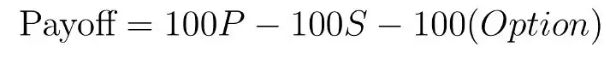

In [ ]:
# Now, add the breakeven point i.e. x:
data['breakeven'] = (data['Strike']-data['Option_Price'])/data['CurrentPrice'] -1

<ipython-input-12-3b447609f0a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['breakeven'] = (data['Strike']-data['Option_Price'])/data['CurrentPrice'] -1


### Here, I consider the contract of 100 stocks, and for visualization consider the shares of PNC

In [ ]:
def generate_payoff(x, dataset):
    new_price = dataset['CurrentPrice']*(1+x)
    cost = 100*new_price - 100*dataset['Strike']- 100*dataset['Option_Price']
    if (cost>=0):
      payoff = cost
    else:
      payoff = -100*dataset['Option_Price']  

    return payoff   


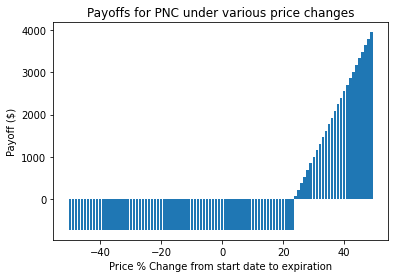

In [ ]:
## let look at cases where price change can take from -50% to 50%:
x = np.arange(-50, 50, 1)
payoffs = []
for p in x:
   payoff = generate_payoff(
   p*0.01,data[data.Ticker == 'PNC'].iloc[6])
   payoffs.append(payoff)
plt.bar(x, payoffs)
plt.xlabel('Price % Change from start date to expiration')
plt.ylabel('Payoff ($)')
plt.title('Payoffs for PNC under various price changes');


### Now we look into generating expected payoff, using the following equation:
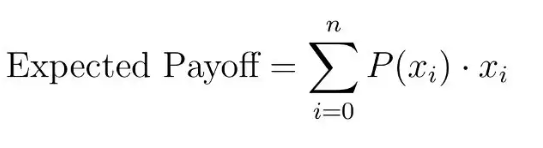
```
`# This is formatted as code`
```


<p> But we also need to find the probability for respective 'x' value, let's find out that </p>

In [ ]:
import random
import datetime

In [ ]:
# Create a distribution function:
def sample_dist(stock, duration, sample_size):
  stock = get_data(stock).close
  dates  = list(stock.index)
  duration = int(duration)
  sample_size = int(sample_size)
  results = []
  for i in range(sample_size):
    try:
      a = random.randint(0,sample_size-1)
      start = stock[a]
      stop = stock[a + duration]
      difference = (stop -start)/(start*1.0)
      results.append(difference)
    except:
      pass

  return results    

In [ ]:
# Creating bins for respective difference percantage, because we have to count in how many cases price change by x%
def create_bin(diff):
  bins= []
  for bin in range(101):  # have range from -50 to +50
     index = (bin-50)*0.01
     def in_which_bin(x):
       return (x<=index+0.01) and (x>index) # tolerance of 1%
     count = list(filter(in_which_bin,diff))
     amount = len(count)/len(diff)  #amount is percent of total
     bins.append(amount)
  return(bins)


In [ ]:
#EXAMPLE : SAMPLE SIZE 200
def visualize(ticker, days,size):
  changes = sample_dist(ticker,days,size)
  binned_changes = create_bin(changes)
  x_axis = np.arange(-50, 51, 1)
  plt.bar(x_axis, binned_changes)
  plt.xlabel('Stock Price % Change')
  plt.ylabel('Probability')
  plt.title('{}: Probability Distribution- {} day price change(Sample Size={})'.format(ticker,days,size));


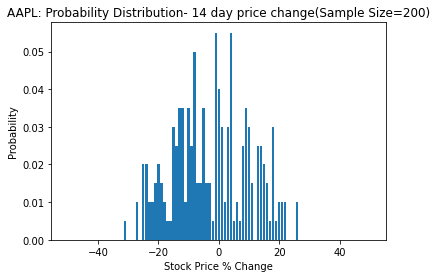

In [ ]:
visualize('AAPL',14,200)

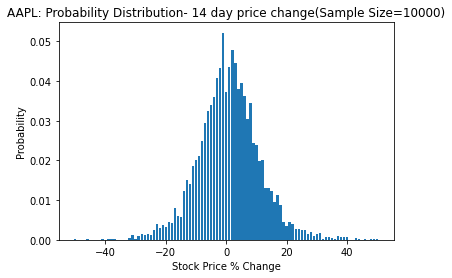

In [ ]:
visualize('AAPL',14,10000)

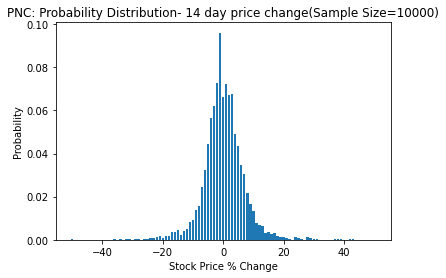

In [ ]:
visualize('PNC',14,10000)

In [ ]:
# Finding the time till exist and creatind a dictionary to record probabilties for eack stock
from datetime import date
from datetime import datetime
timedate_until_exp = datetime.strptime(expiry_date, '%B %d, %Y') - datetime.today()
days_remaining = int(timedate_until_exp.days)
unique_tickers = data['Ticker'].unique().tolist()
sample_size=5000
dictionary= dict()
for ticker in unique_tickers:
  changes = sample_dist(ticker,days_remaining,sample_size)
  ticker_list = create_bin(changes)
  dictionary.update({ticker:ticker_list})


Text(0.5, 1.0, '50 day average % price change for BLK')

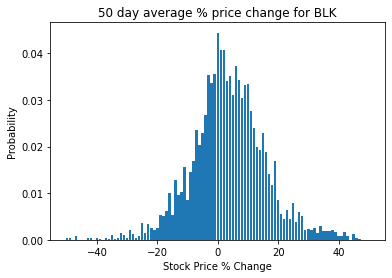

In [ ]:
x = np.arange(-50,51,1)
num = random.randint(0,data['Ticker'].nunique()-1)
plt.bar(x,dictionary[unique_tickers[num]])
plt.xlabel('Stock Price % Change')
plt.ylabel('Probability')
plt.title(str(days_remaining) + " day average % price change for " + str(unique_tickers[num]))

In [ ]:
# Calculate the Expected payoffs for each ticker:
x=  np.arange(-50,51,1)
expected_pay =[]
for i in range(data.shape[0]):
  payoffs =[]
  stock = data.iloc[i].Ticker
  for p in range(len(x)):
    percent = (p-50)*0.01
    payoff = generate_payoff(percent,data.iloc[i])
    payoffs.append(payoff)

  #Now taking out probabilites:
  probs = dictionary[stock]  
  expected_value = sum(np.array(probs)*np.array(payoffs))
  expected_pay.append(expected_value)

data['Expeceted_payoff'] = expected_pay



In [ ]:
data.head()

,Contract Name,Strike,Bid,Ask,CurrentPrice,Volume,Open Interest,Ticker,DateExp,Option_Price,breakeven,Expeceted_payoff
0,A230217C00090000,90.0,41.4,43.6,149.179993,1,1,A,"February 17, 2023",42.50,-0.681593,1428.969662
1,A230217C00100000,100.0,32.9,34.2,149.179993,7,3,A,"February 17, 2023",33.55,-0.554565,1447.449352
2,A230217C00110000,110.0,39.1,40.9,149.179993,1,1,A,"February 17, 2023",40.00,-0.530768,-830.445769
3,A230217C00120000,120.0,20.7,21.3,149.179993,1,1,A,"February 17, 2023",21.00,-0.336372,911.971374
4,A230217C00125000,125.0,29.5,31.4,149.179993,2,57,A,"February 17, 2023",30.45,-0.366202,-973.868033


Text(0.5, 1.0, 'Frequency of Expected Gains and Losses')

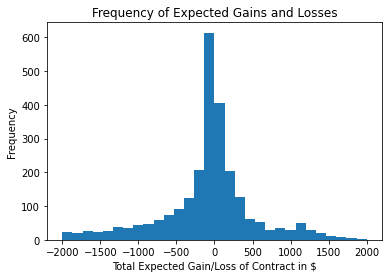

In [ ]:
plt.hist(expected_pay,bins=30 ,range=[-2000, 2000])
plt.xlabel('Total Expected Gain/Loss of Contract in $')
plt.ylabel('Frequency')
plt.title("Frequency of Expected Gains and Losses")
